In [20]:
import cv2
import random
import numpy as np
from sklearn.model_selection import train_test_split
import os
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
import csv
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize
from scipy.signal import convolve2d
from scipy.signal import convolve2d
import matplotlib.pyplot as plt


In [21]:
dataset_path = r"/kaggle/input/cat-dataset/"

#Directory to store images
output_path = "basedirect"
os.makedirs(output_path, exist_ok=True)
if os.path.exists(dataset_path):
    print(f"Folder path exists: {dataset_path}")
else:
    print(f"Folder path does not exist: {dataset_path}")


Folder path exists: /kaggle/input/cat-dataset/


In [23]:
output_images_dir = os.path.join("/kaggle/working/basedirect", "images")
output_annotations_dir = os.path.join( the model"/kaggle/working/basedirect", "annotations")

In [24]:
import os
import shutil

def populate_basedirect(dataset_path, images_dir, annotations_dir):
    # Creating directories if they don't exist
    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(annotations_dir, exist_ok=True)

    # Iterate through the original dataset directory
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            # Iterate through image files in each folder
            for image_file in os.listdir(folder_path):
                if image_file.endswith('.jpg'):
                    # Copy image to the images directory in basedirect
                    src_image_path = os.path.join(folder_path, image_file)
                    dest_image_path = os.path.join(images_dir, image_file)
                    shutil.copyfile(src_image_path, dest_image_path)

                    # Check if annotation file exists
                    annotation_file = os.path.join(folder_path, image_file.replace('.jpg', '.jpg.cat'))
                    if os.path.exists(annotation_file):
                        # Copy annotation file to the annotations directory in basedirect
                        dest_annotation_file = os.path.join(annotations_dir, image_file.replace('.jpg', '.jpg.cat'))
                        shutil.copyfile(annotation_file, dest_annotation_file)

# Defining paths
dataset_path = "/kaggle/input/cat-dataset/"
basedirect_path = "/kaggle/working/basedirect"
output_images_dir = os.path.join(basedirect_path, "images")
output_annotations_dir = os.path.join(basedirect_path, "annotations")

# Populate basedirect directory with images and annotations
populate_basedirect(dataset_path, output_images_dir, output_annotations_dir)


In [26]:
import matplotlib.pyplot as plt
import os
import cv2

def convert_to_grayscale(input_dir, output_dir):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Iterate through the images in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg'):
            # Read the image
            img_path = os.path.join(input_dir, filename)
            img = cv2.imread(img_path)

            # Convert the image to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Write the grayscale image to the output directory
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, gray_img)

input_images_dir = "/kaggle/working/basedirect/images"
output_grayscale_dir = "/kaggle/working/basedirect/grayscale_images"

# Convert images to grayscale
convert_to_grayscale(input_images_dir, output_grayscale_dir)


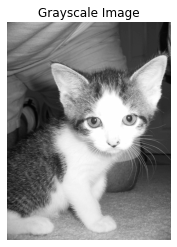

In [17]:
import cv2
import matplotlib.pyplot as plt

# Load a grayscale image for testing
grayscale_image_path = "/kaggle/working/basedirect/grayscale_images/00001077_010.jpg"
grayscale_image = cv2.imread(grayscale_image_path, cv2.IMREAD_GRAYSCALE)

# Display the grayscale image
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()


In [19]:
import os
import cv2
import numpy as np

def apply_convolution_filter_to_directory(input_dir, output_dir, kernel):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Iterate through the grayscale images in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg'):
            # Read the grayscale image
            gray_image_path = os.path.join(input_dir, filename)
            gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)

            # Apply convolution filter
            filtered_image = cv2.filter2D(gray_image, -1, kernel)

            # Write the filtered image to the output directory
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, filtered_image)

#input and output directories
input_grayscale_dir = "/kaggle/working/basedirect/grayscale_images"
output_filtered_dir = "/kaggle/working/basedirect/filtered_images"

# Define the convolution filter (example: edge detection)
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# Apply convolution filter to grayscale images in the input directory and store filtered images in the output directory
apply_convolution_filter_to_directory(input_grayscale_dir, output_filtered_dir, kernel)


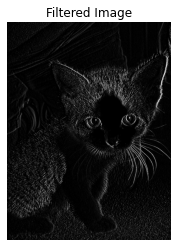

In [20]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the path to the filtered image
filtered_image_path = "/kaggle/working/basedirect/filtered_images/00001077_010.jpg"

# Load the filtered image
filtered_image = cv2.imread(filtered_image_path, cv2.IMREAD_GRAYSCALE)

# Display the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.title('Filtered Image')
plt.show()


In [21]:
import os
import cv2
import numpy as np

# Define the directory paths
input_images_dir = "/kaggle/working/basedirect/grayscale_images"
output_filtered_dir = "/kaggle/working/basedirect/derivative_filtered_images"

# Create the output directory if it doesn't exist
os.makedirs(output_filtered_dir, exist_ok=True)

def apply_derivative_filters(image_path, kernel_1st, kernel_2nd):
    # Read the grayscale image
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply 1st order derivative filter (Sobel)
    filtered_image_sobel = cv2.filter2D(gray_image, -1, kernel_1st)

    # Apply 2nd order derivative filter (Laplacian)
    filtered_image_laplacian = cv2.filter2D(gray_image, -1, kernel_2nd)

    return filtered_image_sobel, filtered_image_laplacian

# Define 1st order derivative filter (Sobel operator)
kernel_sobel_1st = np.array([[-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1]])

# Define 2nd order derivative filter (Laplacian operator)
kernel_laplacian_2nd = np.array([[0, 1, 0],
                                  [1, -4, 1],
                                  [0, 1, 0]])

# Iterate through the grayscale images in the input directory
for filename in os.listdir(input_images_dir):
    if filename.endswith('.jpg'):
        # Apply derivative filters to the grayscale image
        grayscale_image_path = os.path.join(input_images_dir, filename)
        filtered_image_sobel, filtered_image_laplacian = apply_derivative_filters(grayscale_image_path, kernel_sobel_1st, kernel_laplacian_2nd)

        # Write the filtered images to the output directory
        output_image_sobel_path = os.path.join(output_filtered_dir, filename.replace('.jpg', '_sobel.jpg'))
        output_image_laplacian_path = os.path.join(output_filtered_dir, filename.replace('.jpg', '_laplacian.jpg'))
        cv2.imwrite(output_image_sobel_path, filtered_image_sobel)
        cv2.imwrite(output_image_laplacian_path, filtered_image_laplacian)

print("Derivative filters applied and filtered images saved successfully!")


Derivative filters applied and filtered images saved successfully!


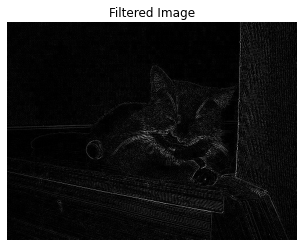

In [22]:
import cv2
import matplotlib.pyplot as plt

# Define the path to the filtered images directory
filtered_images_dir = "/kaggle/working/basedirect/derivative_filtered_images"

# Choose one filtered image for testing
image_filename = "00000157_015_laplacian.jpg"

# Read the filtered image
filtered_image_path = os.path.join(filtered_images_dir, image_filename)
filtered_image = cv2.imread(filtered_image_path, cv2.IMREAD_GRAYSCALE)

# Display the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image")
plt.axis('off')
plt.show()


In [8]:
from keras.applications.vgg16 import VGG16

# load model
vgg = VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))
vgg.trainable = False
# summarize the model
vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [1]:
import enum
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from keras.layers import *
import os

class CatFeatures(enum.Enum):
    # eyes
    LEFT_EYE = 0
    RIGHT_EYE = 1
    # mouth
    MOUTH = 2
    # left ear
    LEFT_EAR_1 = 3
    LEFT_EAR_2 = 4
    LEFT_EAR_3 = 5
    # right ear
    RIGHT_EAR_1 = 6
    RIGHT_EAR_2 = 7
    RIGHT_EAR_3 = 8
    
def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    labels = load_labels(path)[1:]

    w,h = img.shape[:2]
    
    return img, labels , w , h
    
def load_labels(path):
    path = path + ".cat"
    
    with open(path,'r') as f:
        coordinates = f.readline()
        coordinates = str(coordinates).split(' ')[:-1]
    
    return list(map(int,coordinates))

#Facial landmarks to image mapper function
def map_labels(labels):
    x = labels[0:18:2]
    y = labels[1:18:2]
    
    features ={
        CatFeatures.LEFT_EYE : (),
        CatFeatures.RIGHT_EYE : (),
        CatFeatures.MOUTH : (),
        CatFeatures.LEFT_EAR_1 : (),
        CatFeatures.LEFT_EAR_2 : (),
        CatFeatures.LEFT_EAR_3 : (),
        CatFeatures.RIGHT_EAR_1 : (),
        CatFeatures.RIGHT_EAR_2 : (),
        CatFeatures.RIGHT_EAR_3 : (),
              }
    for key,xpoint,ypoint in zip(features.keys(),x,y):
        features[key] = (xpoint,ypoint)
    
    return features
    
def init_dataset(path,preprocess=False):
    root_path = path
    images = []
    labels = []
    
    for root,_,files in os.walk(root_path):
        for file in files:
            if file.endswith('.jpg'):
                x,y,w,h = load_image(os.path.join(root,file))
                
                if preprocess:
                    x = preprocess_image(x)
                    y = preprocess_labels(y,w,h)
                images.append(x)
                labels.append(y)
    
    images = np.asarray(images)
    labels = np.asarray(labels)
    
    return images, labels.reshape(-1,18)

def preprocess_image(image):
    x = image / 255.0
    x = cv2.resize(x,(224,224))
    x = np.asarray(x).astype('float32')
    return x

def preprocess_labels(labels,width,height):
    y = labels
    y[0:18:2] = list(map(lambda point: point / width, y[0:18:2])) # x
    y[1:18:2] = list(map(lambda point: point / height, y[1:18:2])) # y
    return y

def create_dense_layer(nodes):
    layer = [
        Dense(nodes,activation='relu'),
        BatchNormalization(),
        #Dropout(0.2)
    ]
    return layer

def create_regression_net():
    start_nodes = 256
    nb_layers = 4
    
    regression = Sequential()
    regression.add(BatchNormalization())
    
    for i in range(nb_layers):
        nodes = start_nodes / 2
        
        layers = create_dense_layer(nodes)
        
        for l in layers:
            regression.add(l)
        
        start_nodes = nodes
        
    regression.add(Dense(18,activation='sigmoid'))
    
    return regression
#Network builder utilizing VGG 16 feature extractor
def build_network(feature_extractor_net):
    model = Sequential()
    model.add(feature_extractor_net)
    model.add(Flatten())
    model.add(create_regression_net())

    return model

def decode_labels(labels,width,heigth):
    labels[0:18:2] = labels[0:18:2] * width
    labels[1:18:2] = labels[1:18:2] * heigth
    return labels

def predict_image(path, model):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    (w, h) = img.shape[:2]
    
    # predictions
    image_preprocessed = preprocess_image(img)
    y = model.predict(np.expand_dims(image_preprocessed, axis=0)).flatten()
    y = decode_labels(y, w, h)
    show_cat(img,y)

def show_cat(image,labels):
    features = map_labels(labels)

    plt.imshow(image)
    
    
    x,y = [],[]
    points = [CatFeatures.LEFT_EAR_1,
              CatFeatures.LEFT_EAR_2,
              CatFeatures.LEFT_EAR_3,
              CatFeatures.RIGHT_EAR_1,
              CatFeatures.RIGHT_EAR_2,
              CatFeatures.RIGHT_EAR_3,
              CatFeatures.MOUTH,
              CatFeatures.LEFT_EAR_1,
             ]
    
    for p in points:
        x.append(features[p][0])
        y.append(features[p][1])
    
    lines = plt.plot(x,y,marker='*')
    plt.setp(lines, color='c',)
    plt.show()

In [9]:
# importing DATASET
train_paths = ['../input/cat-dataset/CAT_00/','../input/cat-dataset/CAT_01/']

x_train,y_train = np.empty((0,224,224,3)), np.empty((0,18))

for path in train_paths:
    (x,y) = init_dataset(path,preprocess=True)
    x_train = np.vstack((x_train,x))
    y_train = np.vstack((y_train,y))


In [10]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.30, random_state=42)

In [11]:
#Checking shape of data to check if it fits for our model structure
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2326, 224, 224, 3)
(998, 224, 224, 3)
(2326, 18)
(998, 18)


In [5]:
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

model = build_network(vgg)
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 18)                3323874   
Total params: 18,038,562
Trainable params: 3,273,218
Non-trainable params: 14,765,344
_________________________________________________________________


In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='mse',metrics=['accuracy'])

# **VGG16**

In [7]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, batch_size=32)

history.history['loss']
history.history['val_loss']
history.history['accuracy']
history.history['val_accuracy']

Epoch 1/150
73/73 [==============================] - 21s 146ms/step - loss: 0.0794 - accuracy: 0.1316 - val_loss: 0.0550 - val_accuracy: 0.1743
Epoch 2/150
73/73 [==============================] - 7s 92ms/step - loss: 0.0476 - accuracy: 0.2158 - val_loss: 0.0352 - val_accuracy: 0.3086
Epoch 3/150
73/73 [==============================] - 7s 92ms/step - loss: 0.0282 - accuracy: 0.3525 - val_loss: 0.0236 - val_accuracy: 0.4729
Epoch 4/150
73/73 [==============================] - 7s 91ms/step - loss: 0.0169 - accuracy: 0.4785 - val_loss: 0.0183 - val_accuracy: 0.5551
Epoch 5/150
73/73 [==============================] - 7s 91ms/step - loss: 0.0112 - accuracy: 0.5735 - val_loss: 0.0163 - val_accuracy: 0.6162
Epoch 6/150
73/73 [==============================] - 7s 90ms/step - loss: 0.0090 - accuracy: 0.6101 - val_loss: 0.0157 - val_accuracy: 0.6062
Epoch 7/150
73/73 [==============================] - 7s 91ms/step - loss: 0.0079 - accuracy: 0.6264 - val_loss: 0.0152 - val_accuracy: 0.6072
Epoc

[0.17434869706630707,
 0.3086172342300415,
 0.472945898771286,
 0.5551102161407471,
 0.6162324547767639,
 0.6062124371528625,
 0.6072144508361816,
 0.6062124371528625,
 0.6002004146575928,
 0.5991984009742737,
 0.6102204322814941,
 0.6042084097862244,
 0.6132264733314514,
 0.6332665085792542,
 0.6382765769958496,
 0.6523045897483826,
 0.6452905535697937,
 0.6442885994911194,
 0.6452905535697937,
 0.6452905535697937,
 0.648296594619751,
 0.657314658164978,
 0.6533066034317017,
 0.6503006219863892,
 0.6533066034317017,
 0.6442885994911194,
 0.6543086171150208,
 0.6442885994911194,
 0.6503006219863892,
 0.6653306484222412,
 0.6583166122436523,
 0.6643286347389221,
 0.6583166122436523,
 0.6703406572341919,
 0.6583166122436523,
 0.6452905535697937,
 0.6533066034317017,
 0.6633266806602478,
 0.6533066034317017,
 0.6492986083030701,
 0.6553106307983398,
 0.6553106307983398,
 0.6472945809364319,
 0.6623246669769287,
 0.6553106307983398,
 0.6703406572341919,
 0.657314658164978,
 0.6553106307983

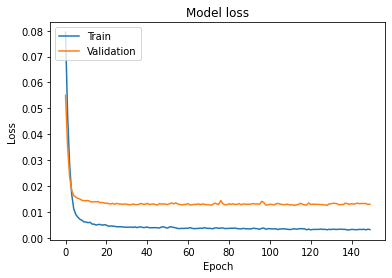

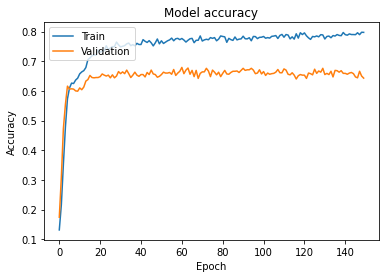

In [8]:
#Plots
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
#Saving the model file
model.save('cat_vgg16.h5')
from IPython.display import FileLink
FileLink("cat_vgg16.h5")

/kaggle/working/cat_vgg16.h5

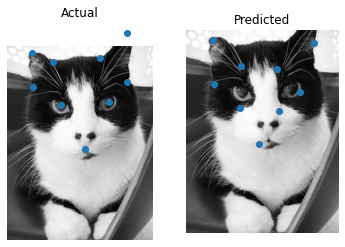

In [10]:
img,l,w,h = load_image('/kaggle/input/cat-dataset/CAT_06/00001292_007.jpg')

# Actual
figure = plt.subplot(1,2,1)
figure.set_title('Actual')
plt.axis('off')
plt.imshow(img)
plt.scatter(l[0:18:2],l[1:18:2])

# predictions

image = preprocess_image(img)
y = model.predict(np.expand_dims(image,axis=0)).flatten()
y = decode_labels(y,w,h)

figure = plt.subplot(1,2,2)
figure.set_title('Predicted')
plt.axis('off')
plt.imshow(img)
plt.scatter(y[0:18:2],y[1:18:2])





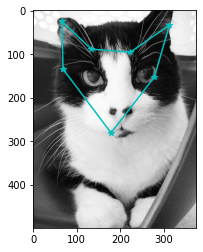

In [11]:
predict_image('/kaggle/input/cat-dataset/CAT_06/00001292_007.jpg',model)

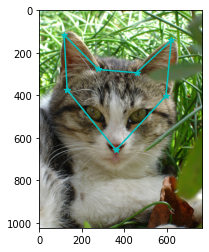

In [12]:
predict_image('/kaggle/input/cat-dataset/CAT_01/00000100_002.jpg',model)

# **CNN**

In [9]:
import enum
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



class CatFeatures(enum.Enum):
    # eyes
    LEFT_EYE = 0
    RIGHT_EYE = 1
    # mouth
    MOUTH = 2
    # left ear
    LEFT_EAR_1 = 3
    LEFT_EAR_2 = 4
    LEFT_EAR_3 = 5
    RIGHT_EAR_1 = 6
    RIGHT_EAR_2 = 7
    RIGHT_EAR_3 = 8

#CNN
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(18, activation='sigmoid'))  # 18 keypoints (x, y) pairs
    
    return model

def train_model(x_train, y_train, x_test, y_test):
    input_shape = x_train.shape[1:]
    model = create_cnn_model(input_shape)
    model.compile(loss='mse', optimizer=Adam(), metrics=['mae', 'accuracy'])  # Include 'accuracy' metric
    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    
    history = model.fit(x_train, y_train, batch_size=32, epochs=32, validation_data=(x_test, y_test), callbacks=[checkpoint])
    
    # Print MAE and accuracy during training
    print("Train MAE:", history.history['mae'])
    print("Validation MAE:", history.history['val_mae'])
    print("Train Accuracy:", history.history['accuracy'])  # Print accuracy
    
    return model, history





# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.30, random_state=42)


# Training
trained_model, history = train_model(x_train, y_train, x_test, y_test)



Epoch 1/32
51/51 [==============================] - 10s 59ms/step - loss: 0.0666 - mae: 0.1987 - accuracy: 0.5061 - val_loss: 0.0422 - val_mae: 0.1616 - val_accuracy: 0.5143

Epoch 00001: val_loss improved from inf to 0.04216, saving model to best_model.h5
Epoch 2/32
51/51 [==============================] - 2s 32ms/step - loss: 0.0376 - mae: 0.1502 - accuracy: 0.5651 - val_loss: 0.0398 - val_mae: 0.1489 - val_accuracy: 0.5802

Epoch 00002: val_loss improved from 0.04216 to 0.03978, saving model to best_model.h5
Epoch 3/32
51/51 [==============================] - 2s 33ms/step - loss: 0.0303 - mae: 0.1324 - accuracy: 0.5086 - val_loss: 0.0363 - val_mae: 0.1463 - val_accuracy: 0.4226

Epoch 00003: val_loss improved from 0.03978 to 0.03626, saving model to best_model.h5
Epoch 4/32
51/51 [==============================] - 2s 32ms/step - loss: 0.0215 - mae: 0.1097 - accuracy: 0.5584 - val_loss: 0.0343 - val_mae: 0.1403 - val_accuracy: 0.4642

Epoch 00004: val_loss improved from 0.03626 to 0.

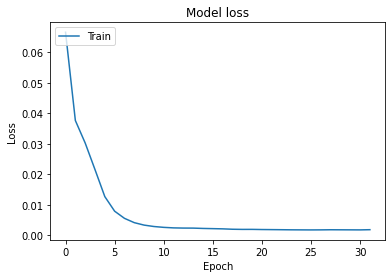

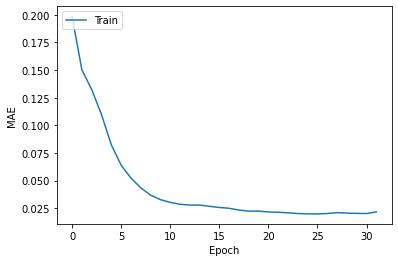

In [11]:
#Plots

def plot_training_history(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
    plt.show()

    # Plot training & validation MAE values
    plt.plot(history.history['mae'])
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
    plt.show()

# Plot the training history
plot_training_history(history)

In [12]:
#Saving the model file
trained_model.save('cat_cnn.h5')
from IPython.display import FileLink
FileLink("cat_cnn.h5")

/kaggle/working/cat_cnn.h5

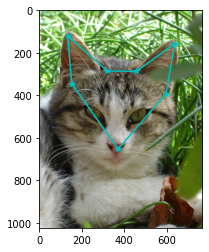

In [18]:
predict_image('/kaggle/input/cat-dataset/CAT_01/00000100_002.jpg',trained_model)


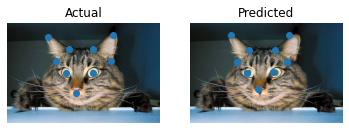

In [19]:
img,l,w,h = load_image('/kaggle/input/cat-dataset/CAT_04/00000901_011.jpg')

# Actual
figure = plt.subplot(1,2,1)
figure.set_title('Actual')
plt.axis('off')
plt.imshow(img)
plt.scatter(l[0:18:2],l[1:18:2])

# predictions

image = preprocess_image(img)
y = model.predict(np.expand_dims(image,axis=0)).flatten()
y = decode_labels(y,w,h)

figure = plt.subplot(1,2,2)
figure.set_title('Predicted')
plt.axis('off')
plt.imshow(img)
plt.scatter(y[0:18:2],y[1:18:2])

# **VGG 19**

In [19]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

input_shape = (224, 224, 3)

vgg = VGG19(input_shape=input_shape, weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(18, activation='sigmoid')(x) 

model = Model(inputs=vgg.input, outputs=prediction)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','mae'])

def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch!= 0:
        lr *= 0.1
    return lr

history = model.fit(x_train, y_train, 
    validation_data=(x_test, y_test), 
    epochs=20, 
    batch_size=32, 
    callbacks=[LearningRateScheduler(lr_scheduler)]
)


Epoch 1/20
73/73 [==============================] - 10s 132ms/step - loss: 0.6380 - accuracy: 0.3977 - mae: 0.1536 - val_loss: 0.5590 - val_accuracy: 0.3527 - val_mae: 0.1113
Epoch 2/20
73/73 [==============================] - 8s 109ms/step - loss: 0.5411 - accuracy: 0.5555 - mae: 0.0915 - val_loss: 0.5507 - val_accuracy: 0.5812 - val_mae: 0.1046
Epoch 3/20
73/73 [==============================] - 8s 109ms/step - loss: 0.5246 - accuracy: 0.6096 - mae: 0.0767 - val_loss: 0.5498 - val_accuracy: 0.6242 - val_mae: 0.1009
Epoch 4/20
73/73 [==============================] - 8s 108ms/step - loss: 0.5157 - accuracy: 0.6032 - mae: 0.0696 - val_loss: 0.5414 - val_accuracy: 0.5882 - val_mae: 0.1022
Epoch 5/20
73/73 [==============================] - 8s 108ms/step - loss: 0.5064 - accuracy: 0.6208 - mae: 0.0648 - val_loss: 0.5440 - val_accuracy: 0.5681 - val_mae: 0.1054
Epoch 6/20
73/73 [==============================] - 8s 108ms/step - loss: 0.4976 - accuracy: 0.6354 - mae: 0.0583 - val_loss: 0.5

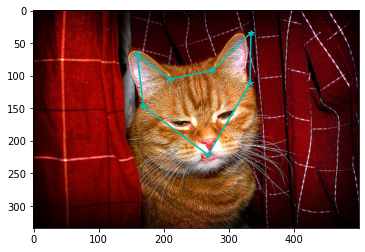

In [32]:
predict_image('/kaggle/input/cat-dataset/CAT_01/00000100_012.jpg',model)


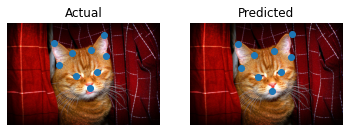

In [33]:
img,l,w,h = load_image('/kaggle/input/cat-dataset/CAT_01/00000100_012.jpg')

# Actual
figure = plt.subplot(1,2,1)
figure.set_title('Actual')
plt.axis('off')
plt.imshow(img)
plt.scatter(l[0:18:2],l[1:18:2])

# predictions

image = preprocess_image(img)
y = model.predict(np.expand_dims(image,axis=0)).flatten()
y = decode_labels(y,w,h)

figure = plt.subplot(1,2,2)
figure.set_title('Predicted')
plt.axis('off')
plt.imshow(img)
plt.scatter(y[0:18:2],y[1:18:2])

In [35]:
#Saving the model file
model.save('cat_vgg19.h5')
from IPython.display import FileLink
FileLink("cat_vgg19.h5")

/kaggle/working/cat_vgg19.h5

# **ALL MODELS / TRANSFER LEARNING MODEL THAT WE TRIED/EXPLORED BUT WERE NOT EITHER GOOD ENOUGH OR USEABLE**

* MLP
* ViT Transformer
* YuNet

# MLP

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Shape of input features
input_shape = (224,224,3)  

# Flatten the images before scaling
x_train_flat = x_train.reshape((x_train.shape[0], -1))  
x_test_flat = x_test.reshape((x_test.shape[0], -1))  

# Normalizing
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)


x_train_scaled = x_train_scaled.reshape(x_train.shape)
x_test_scaled = x_test_scaled.reshape(x_test.shape)

# MLP model
def create_mlp_model(input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))  
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(18, activation='linear'))  
    return model

mlp_model = create_mlp_model(input_shape)

def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch!= 0:
        lr *= 0.1  
    return lr

optimizer = Adam(learning_rate=0.001)
mlp_model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])  # Removed 'accuracy' as it might not be relevant

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

history = mlp_model.fit(x_train_scaled, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stopping, lr_scheduler_callback])


Epoch 1/100
59/59 [==============================] - 3s 31ms/step - loss: 0.4619 - mae: 0.4619 - val_loss: 0.6983 - val_mae: 0.6983
Epoch 2/100
59/59 [==============================] - 1s 17ms/step - loss: 0.2242 - mae: 0.2242 - val_loss: 0.3141 - val_mae: 0.3141
Epoch 3/100
59/59 [==============================] - 1s 18ms/step - loss: 0.1834 - mae: 0.1834 - val_loss: 0.2026 - val_mae: 0.2026
Epoch 4/100
59/59 [==============================] - 1s 17ms/step - loss: 0.1695 - mae: 0.1695 - val_loss: 0.1788 - val_mae: 0.1788
Epoch 5/100
59/59 [==============================] - 1s 18ms/step - loss: 0.1633 - mae: 0.1633 - val_loss: 0.1676 - val_mae: 0.1676
Epoch 6/100
59/59 [==============================] - 1s 17ms/step - loss: 0.1594 - mae: 0.1594 - val_loss: 0.1579 - val_mae: 0.1579
Epoch 7/100
59/59 [==============================] - 1s 17ms/step - loss: 0.1550 - mae: 0.1550 - val_loss: 0.1586 - val_mae: 0.1586
Epoch 8/100
59/59 [==============================] - 1s 17ms/step - loss: 0.

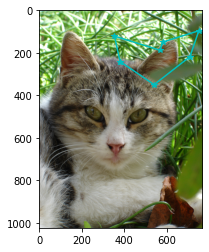

In [14]:
predict_image('/kaggle/input/cat-dataset/CAT_01/00000100_002.jpg',mlp_model)


In [4]:
import cv2
import numpy as np

# Load pre-trained YOLO model
net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]


facial_landmark_model = trained_model

# Load image
image = cv2.imread("/kaggle/input/cat-dataset/CAT_01/00000100_002.jpg")


height, width, _ = image.shape
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)


for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
    
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

        
            face = image[int(center_y - h / 2):int(center_y + h / 2), int(center_x - w / 2):int(center_x + w / 2)]

            landmarks = predict_landmarks(face, facial_landmark_model)

            for landmark in landmarks:
                cv2.circle(image, (landmark[0], landmark[1]), 2, (0, 255, 0), -1)

cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.5.3) /tmp/pip-req-build-fvfwe_ss/opencv/modules/dnn/src/darknet/darknet_importer.cpp:207: error: (-212:Parsing error) Failed to parse NetParameter file: yolov3.cfg in function 'readNetFromDarknet'


In [20]:
pip install torch torchvision transformers


Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import ViTFeatureExtractor, ViTForImageClassification
from sklearn.model_selection import train_test_split
import numpy as np


x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 5
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs.logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_loss = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs.logits, labels)
            val_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss/len(test_loader)}")

model.save_pretrained("fine_tuned_vit")


Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

ValueError: Input image size (224*3) doesn't match model (224*224).

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# YuNet architecture
def create_yunet(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(18, activation='linear'))  # Output layer with 18 units for facial landmarks
    return model

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

input_shape = (224, 224, 3)  
yunet_model = create_yunet(input_shape)
yunet_model.compile(optimizer=optimizer, loss=loss_fn)


yunet_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = yunet_model.evaluate(x_test, y_test)
print("Test Loss:", loss)

# Save the model for future use
yunet_model.save("yunet_model.h5")


Epoch 1/10
59/59 [==============================] - 10s 48ms/step - loss: 0.7216 - val_loss: 0.0428
Epoch 2/10
59/59 [==============================] - 2s 31ms/step - loss: 0.0412 - val_loss: 0.0442
Epoch 3/10
59/59 [==============================] - 2s 32ms/step - loss: 0.0408 - val_loss: 0.0425
Epoch 4/10
59/59 [==============================] - 2s 31ms/step - loss: 0.0379 - val_loss: 0.0487
Epoch 5/10
59/59 [==============================] - 2s 34ms/step - loss: 0.0370 - val_loss: 0.0445
Epoch 6/10
59/59 [==============================] - 2s 31ms/step - loss: 0.0314 - val_loss: 0.0606
Epoch 7/10
59/59 [==============================] - 2s 31ms/step - loss: 0.0282 - val_loss: 0.0357
Epoch 8/10
59/59 [==============================] - 2s 31ms/step - loss: 0.0230 - val_loss: 0.0418
Epoch 9/10
59/59 [==============================] - 2s 32ms/step - loss: 0.0189 - val_loss: 0.0353
Epoch 10/10
32/32 [==============================] - 0s 14ms/step - loss: 0.0321
Test Loss: 0.03210994973778

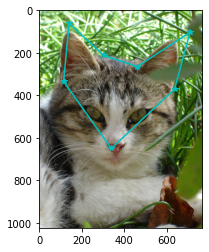

In [13]:
predict_image('/kaggle/input/cat-dataset/CAT_01/00000100_002.jpg',yunet_model)
